# MD maps - Centiloids


In [7]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

In [8]:
excel_fp = '/home/grg/SPM/2018/amylstaging_FA_centiloids.xls'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm
pd.read_excel(excel_fp).head()


Found SPM files: ['/home/grg/SPM/2018/amylstaging_FA_centiloids/estimatecontrasts/SPM.mat']


,images,age,gender,apoe,centiloids
0,/home/grg/data/AmylStaging/dartel_final/spm/FA...,63.422313,2,0,-7.62
1,/home/grg/data/AmylStaging/dartel_final/spm/FA...,54.757016,1,0,-1.84
2,/home/grg/data/AmylStaging/dartel_final/spm/FA...,50.390144,2,2,-0.16
3,/home/grg/data/AmylStaging/dartel_final/spm/FA...,54.151951,1,0,-4.12
4,/home/grg/data/AmylStaging/dartel_final/spm/FA...,52.878850,1,0,-17.65


In [9]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/SPM/2018/amylstaging_FA_centiloids.xls looking up column FA ...
Analysis name: amylstaging_FA_centiloids
First column: images
Columns in the model: [u'age', u'gender', u'apoe', u'centiloids']
Effect of Centiloids
Effect of Gender
Effect of Linear age
Analysis name: amylstaging_FA_centiloids
Scans (107): [u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10019_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10044_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10065_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10070_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10137_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10162_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10200_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10225_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10235_FA_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/FA/10245_FA_s.nii', u'/home/grg/data

,contrast name,contrast type,covariate names,covariate weights
0,Effect Centiloids,T,[centiloids],[1.0]
1,Effect Gender,T,[gender],[1.0]
2,Effect Linear age,T,[age],[1.0]


/home/grg/SPM/2018/amylstaging_FA_centiloids/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpeYmxBN.png
/home/grg/SPM/2018/amylstaging_FA_centiloids/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmp2vZbUt.png
/home/grg/SPM/2018/amylstaging_FA_centiloids/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpLPz8SG.png


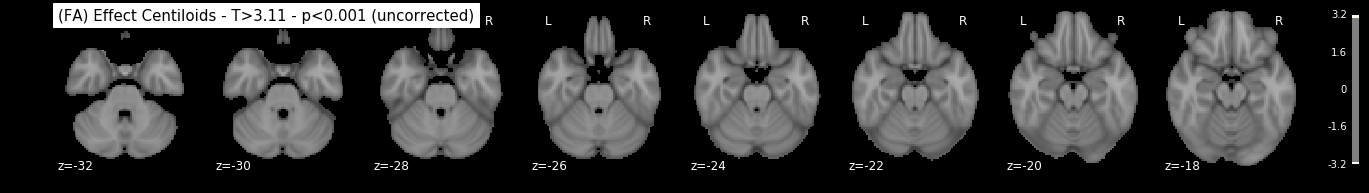

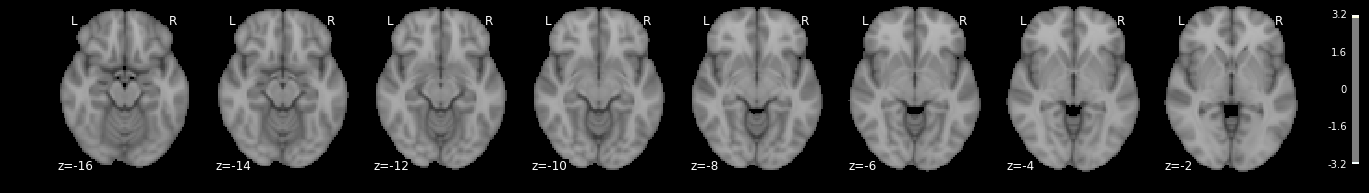

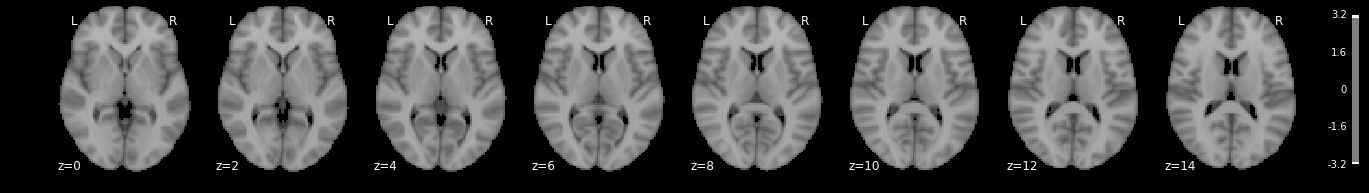

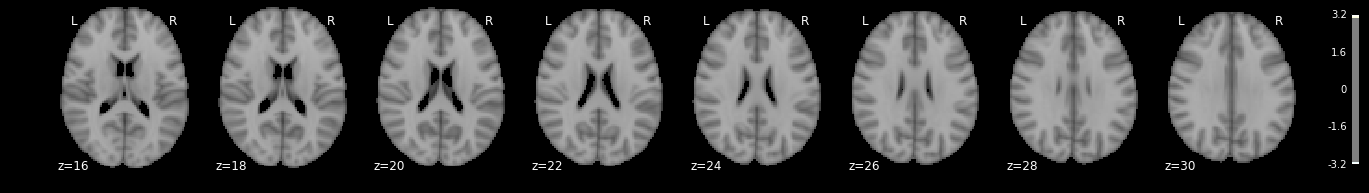

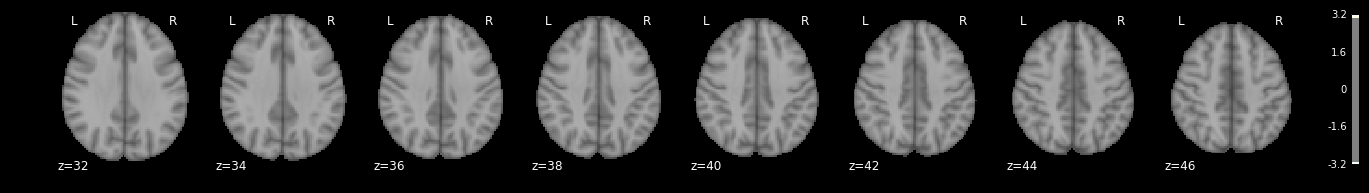

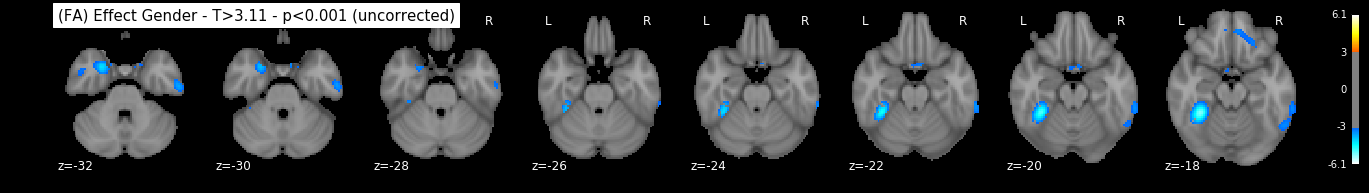

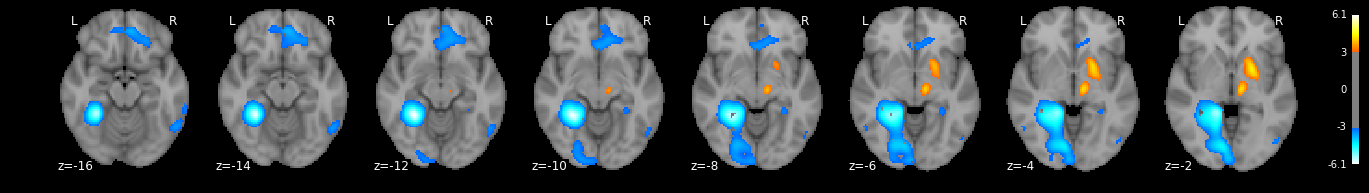

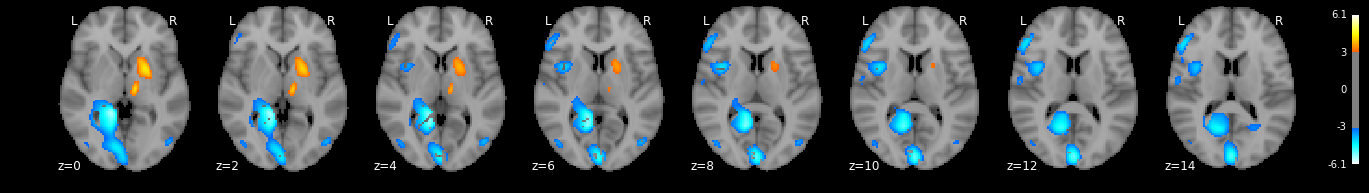

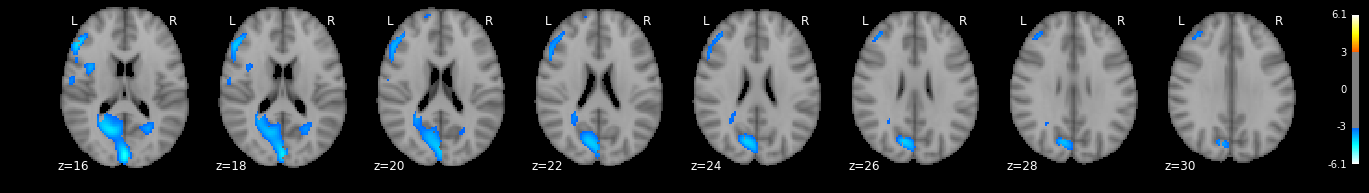

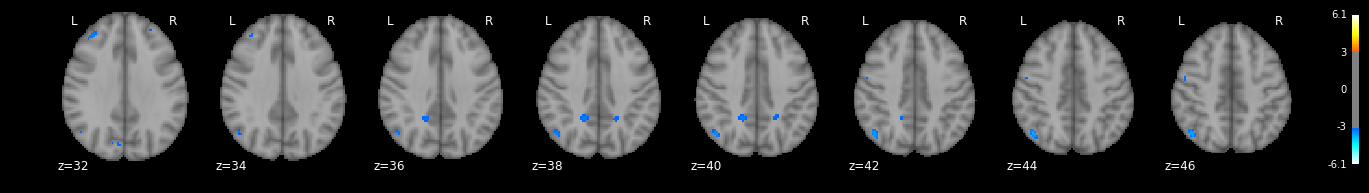

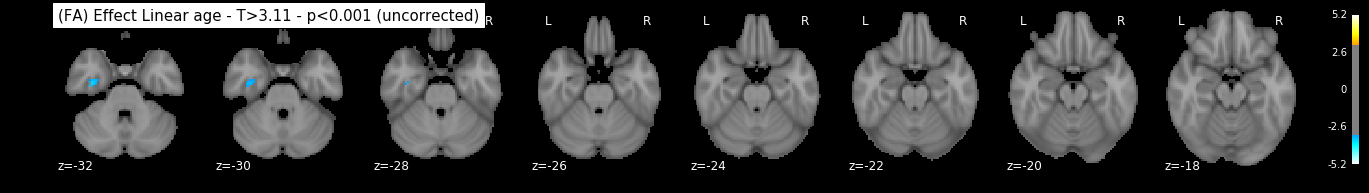

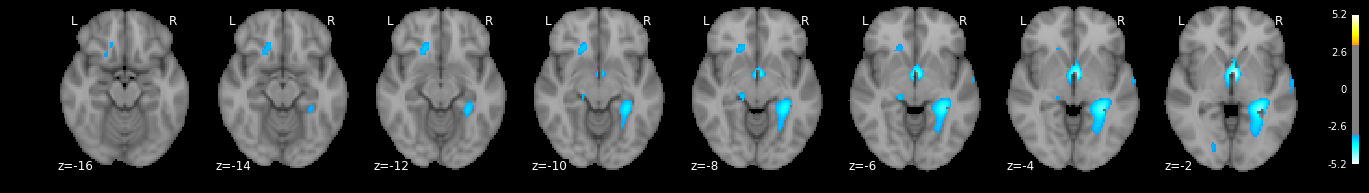

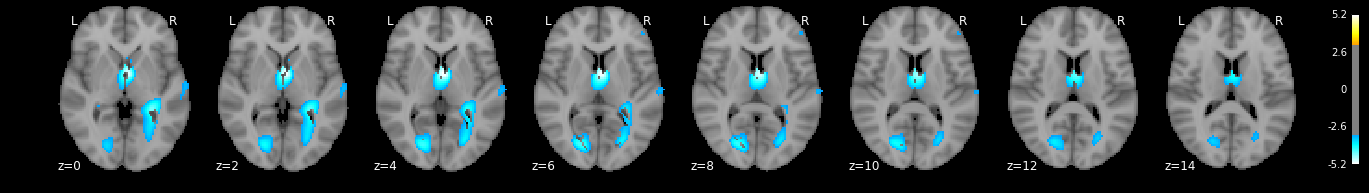

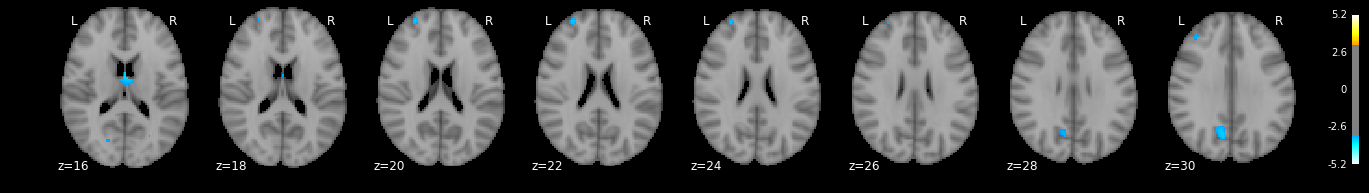

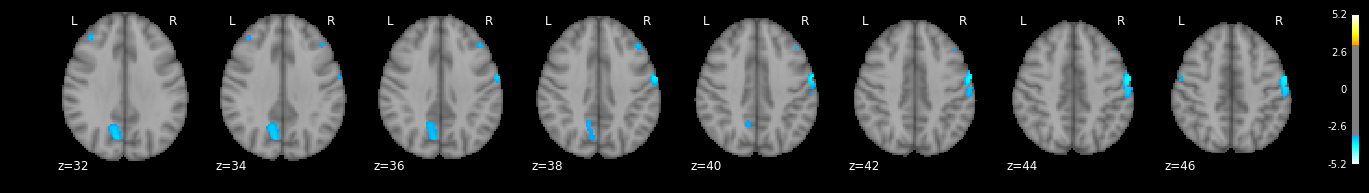

In [10]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')

In [11]:
spm_mat_file = '/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts/SPM.mat'
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

AssertionError: 